In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  sklearn.metrics as metrics

In [35]:
df = pd.read_csv('heartdisease.csv')

In [36]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [37]:
## Null check
df.isnull().sum().sum()

645

In [38]:
## Filing the Nan values
df.fillna(0,inplace = True)

In [39]:
df.isnull().sum().sum()

0

In [40]:
shuffle_df = df.sample(frac = 1)

In [41]:
shuffle_df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
2816     0   43        1.0              0         0.0     0.0   
2734     0   63        1.0              0         0.0     0.0   
89       1   41        2.0              0         0.0     0.0   
1996     0   51        2.0              0         0.0     0.0   
3314     0   47        1.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
2816                0             0         0    230.0  116.0   86.0  27.78   
2734                0             1         0    180.0  170.5  100.5  27.69   
89                  0             0         0    274.0  121.0   61.5  25.42   
1996                0             0         0    224.0  111.5   77.0  24.08   
3314                1             0         0    220.0  124.0   75.5  24.71   

      heartRate  glucose  TenYearCHD  
2816       62.0     78.0           0  
2734       86.0     63.0           0  
89         80.0     76.0           0  
1996       63.0     74.0           0  
3314       65.0     68.0           0

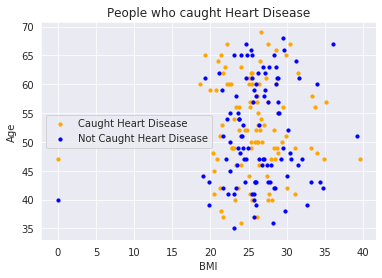

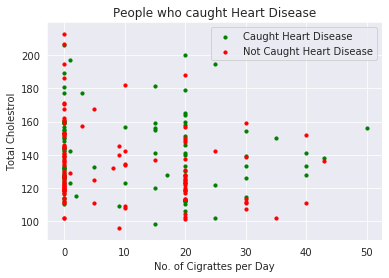

In [42]:
## Visualising our data
Y = shuffle_df.iloc[:,-1]
caught_disease = shuffle_df.loc[Y==1]
not_caught_disease = shuffle_df.loc[Y==0]

plt.ylabel('Age')
plt.xlabel('BMI')
plt.title('People who caught Heart Disease')
plt.scatter(caught_disease.iloc[:100,12],caught_disease.iloc[:100,1] , s = 10 , c = 'orange' , label = 'Caught Heart Disease')
plt.scatter(not_caught_disease.iloc[:100,12],not_caught_disease.iloc[:100,1] , s = 10 , c = 'blue' , label = 'Not Caught Heart Disease')
plt.legend()
plt.show()

plt.ylabel('Total Cholestrol')
plt.xlabel('No. of Cigrattes per Day')
plt.title('People who caught Heart Disease')
plt.scatter(caught_disease.iloc[:100,4],caught_disease.iloc[:100,10] , s = 10 , c = 'green' , label = 'Caught Heart Disease')
plt.scatter(not_caught_disease.iloc[:100,4],not_caught_disease.iloc[:100,10] , s = 10 , c = 'red' , label = 'Not Caught Heart Disease')
plt.legend()
plt.show()

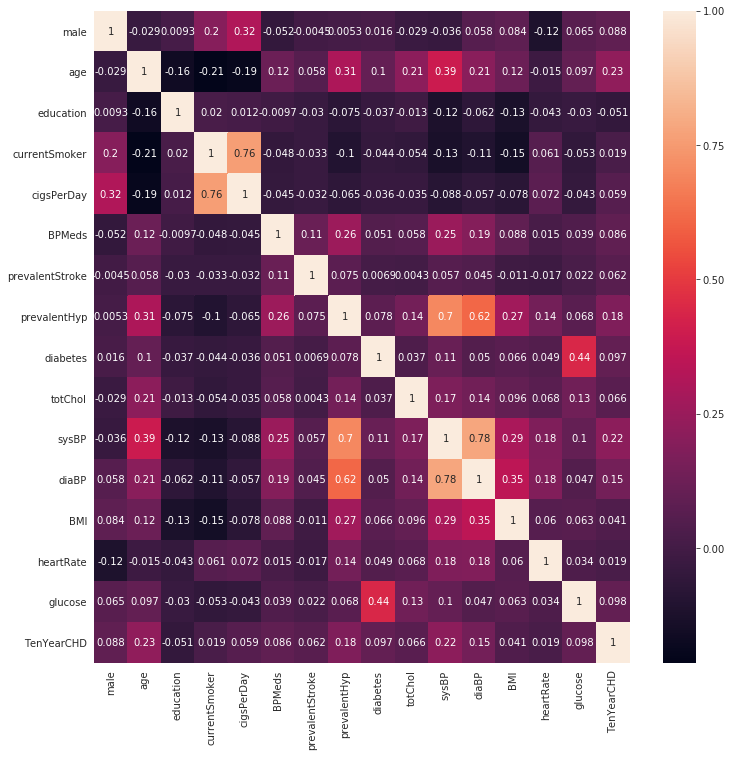

In [43]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


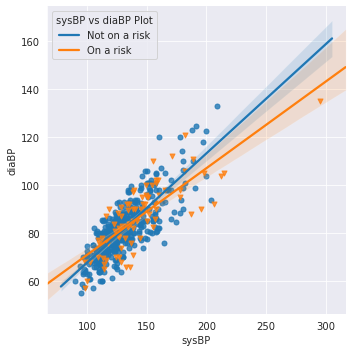

In [44]:
sns.set_style('darkgrid')
sns.lmplot(x = 'sysBP' , y = 'diaBP' , data = df[:500] , hue = 'TenYearCHD' , markers = ['o','v'] , scatter_kws={'s':25} , legend = False)
plt.legend(title = 'sysBP vs diaBP Plot' , loc = 'upper_left' , labels = ['Not on a risk','On a risk'])
plt.show()

In [45]:
y = shuffle_df.iloc[:,-1].values.reshape(-1,1)
x = shuffle_df.iloc[:,:-1].values.reshape(-1,15)

train_size = int(0.7* len(shuffle_df))

In [46]:
## Normalized the data
for i in range(15):
    x[:,i] = (x[:,i] - min(x[:,i])) / (max(x[:,i]) - min(x[:,i]))

In [47]:
x

array([[0.        , 0.28947368, 0.25      , ..., 0.48908451, 0.43356643,
        0.19796954],
       [0.        , 0.81578947, 0.25      , ..., 0.4875    , 0.6013986 ,
        0.15989848],
       [1.        , 0.23684211, 0.5       , ..., 0.44753521, 0.55944056,
        0.1928934 ],
       ...,
       [0.        , 0.13157895, 0.5       , ..., 0.72693662, 0.55944056,
        0.14720812],
       [1.        , 0.34210526, 0.5       , ..., 0.53926056, 0.55944056,
        0.36548223],
       [1.        , 0.42105263, 1.        , ..., 0.48380282, 0.46853147,
        0.19796954]])

In [48]:
## Splitting dataset into train and test
X_train , X_test , y_train , y_test = x[:train_size] , x[train_size:] , y[:train_size] , y[train_size:]

In [49]:
X_train

array([[0.        , 0.28947368, 0.25      , ..., 0.48908451, 0.43356643,
        0.19796954],
       [0.        , 0.81578947, 0.25      , ..., 0.4875    , 0.6013986 ,
        0.15989848],
       [1.        , 0.23684211, 0.5       , ..., 0.44753521, 0.55944056,
        0.1928934 ],
       ...,
       [1.        , 0.47368421, 0.25      , ..., 0.51866197, 0.54545455,
        0.29187817],
       [1.        , 0.57894737, 0.25      , ..., 0.45616197, 0.45454545,
        0.18020305],
       [1.        , 0.42105263, 0.25      , ..., 0.42464789, 0.51048951,
        0.20050761]])

In [50]:
## Preping our data
ones = np.ones([X_train.shape[0],1] , dtype = np.float128)
X_train = np.concatenate((ones,X_train),axis=1)
theta = np.zeros([1,X_train.shape[1]], dtype = np.float128)


In [51]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [52]:
def compute_cost(X, y, theta):
    m = len(y)
    
    h = sigmoid(X @ theta.T)
    epsilon = 1e-5
    cost = 1/m * np.sum((-y).T @ np.log(sigmoid(X @ theta.T)) - (1-y).T @ np.log(1 - sigmoid(X @ theta.T )))
    return cost

In [53]:
def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    
    costing = np.zeros((iters,1))

    for i in range(iters):
        ALPHA = sigmoid(X @theta.T)
        BETA = (ALPHA - y).T
        SIGMA = alpha/m * (BETA @ X)
        theta = theta - SIGMA
        costing[i] = compute_cost(X, y, theta)

    return theta , costing

In [54]:
def predict(X, theta):
    a = sigmoid(X @ theta.T)
    b = [0. for i in range(len(a))]
    for i in range(len(a)):
        if a[i]>=a.mean():
            b[i] = 1.
        
    
    return b

In [55]:


alpha = 0.03
iters = 1000

initial_cost = compute_cost(X_train, y_train, theta)




In [56]:
THETA , costing = gradient_descent(X_train, y_train, theta, alpha, iters)

y_pred = predict(X_train, THETA)

tp,tn,fp,fn = [0 for _ in range(4)]

for i in range(len(y_pred)):
  if(y_pred[i]==1. and y_train[i]==1.):
    tp+=1
  if(y_pred[i]==0. and y_train[i]==0.):
    tn+=1
  if(y_pred[i]==1. and y_train[i]==0.):
    fp+=1
  if(y_pred[i]==0. and y_train[i]==1.):
    fn+=1

In [57]:
print(tp,tn,fp,fn)

283 1593 898 192


In [58]:
precision = float(tp) / float(fp + tp)
recall = float(tp) / float(tp + fn)
  
f1_score = 2 * float(precision * recall) / float(precision + recall)

In [59]:
print(f"The Accuracy of the model is {f1_score}")

The Accuracy of the model is 0.3417874396135266


In [61]:
threshold = 0.5

In [62]:
fpr,tpr , threshold = metrics.roc_curve(y_train,y_pred) 

In [65]:
roc_auc = metrics.auc(fpr,tpr)

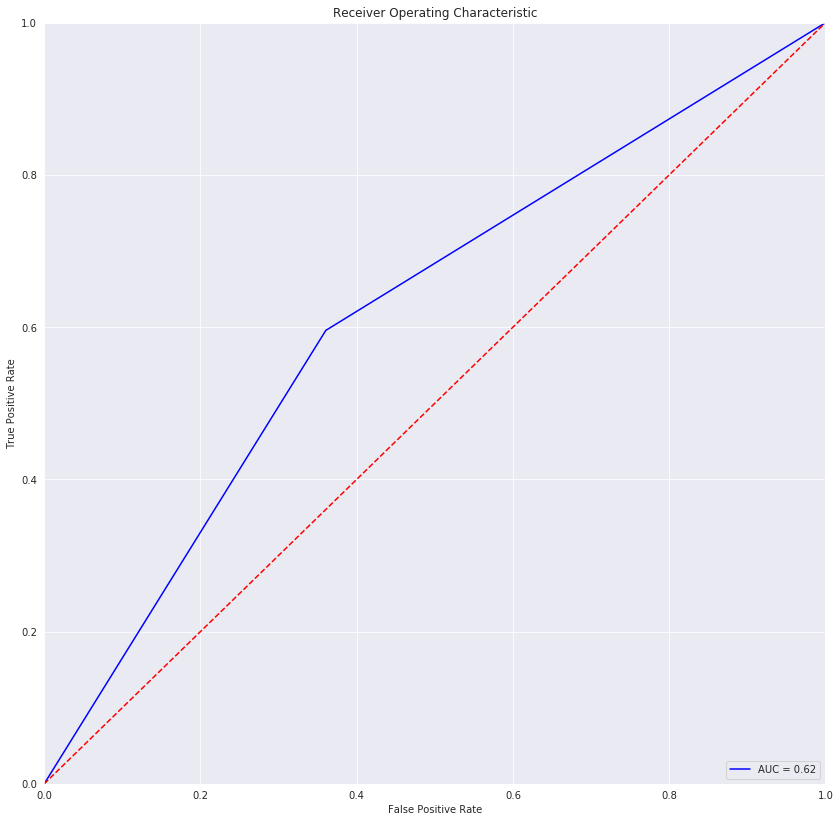

In [67]:
plt.figure(figsize = (14,14))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
## Testing For new Values
ones = np.ones([X_test.shape[0],1] , dtype = np.float128)
X_test = np.concatenate((ones,X_test),axis=1)

NEW = predict(X_test,THETA)
ANS = []
for i in NEW:
    if i == 1.0:
        ANS.append('ON RISK')
    else:
        ANS.append('NOT ON RISK')
ANS